In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from lr_utils import load_dataset

%matplotlib inline

## Read the dataset

In [4]:
X_train_orig, Y_train, X_test_orig, Y_test, classes = load_dataset()

In [5]:
X_train_orig.shape

(209, 64, 64, 3)

## Show a sample

y = [1] it's a cat.


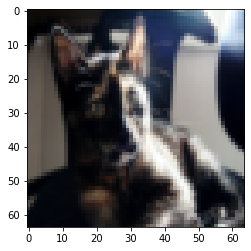

In [19]:
index = 54
plt.imshow(X_train_orig[index])
print('y = ' + str(Y_train[:,index]) + " it's a " + classes[np.squeeze(Y_train[:,index])].decode("utf-8") + ".")

## Describe the data

In [ ]:
X_train = X_train.reshape()